## M&B Insurance Company
With over two decades of industry experience, M&B stand as a trusted partner committed to providing comprehensive insurance solutions. Thier dedicated team of professionals works tirelessly to tailor coverage that suits your unique needs, ensuring peace of mind for individuals, families, and businesses alike. Emphasizing personalized service, transparency, and integrity, they strive to forge enduring relationships with our clients. At M&B Insurance, they firmly believe in putting your interests first, empowering you to embrace life's opportunities with confidence, knowing you are protected by a reliable and caring partner.
#### Data Dictionary
- Balance
- Balance Frequency
- Purchases
- One-off Purchases
- Installment Purchases
- Cash Advance
- Purchases Frequency
- One-off Purchases
- Frequency
- Purchases Installments
- Frequency
- Cash Advance Frequency
- Cash Advance TRX
- Purchases TRX
- Credit Limit
- Payments
- Minimum Payments
- PRC Full payment
- Tenure

<span style="color:red">
    <h3>Limitations in the Dataset</h3>
    The dataset used as the case study presents certain limitations that need to be considered when interpreting the results and drawing conclusions. While the data dictionary provides valuable information about the variables but lacks their definitions, it lacks essential details related to the domain knowledge of the company or industry under investigation.
Conclusively, without a comprehensive understanding of the specific context in which the data was collected, some important aspects remain obscured. For instance, the dataset did not capture all relevant factors that impact the industry's performance, potentially leading to biased or incomplete analyses.</span>

### Installing Package and Importing Library

In [1]:
#!pip install scikit-learn

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
# importing Library

# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from mpl_toolkits.mplot3d import Axes3D

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# classifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading in data
df=pd.read_csv(r"C:\Users\FOLASADE\OneDrive\Desktop\Learning\DataSci Learn 10Alytics\PDF for Practice\1Python Pract\insurance Customer Data_.csv")
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


### Investigating the Dataset

In [5]:
df.shape

(8950, 18)

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Investigating for Missing Values

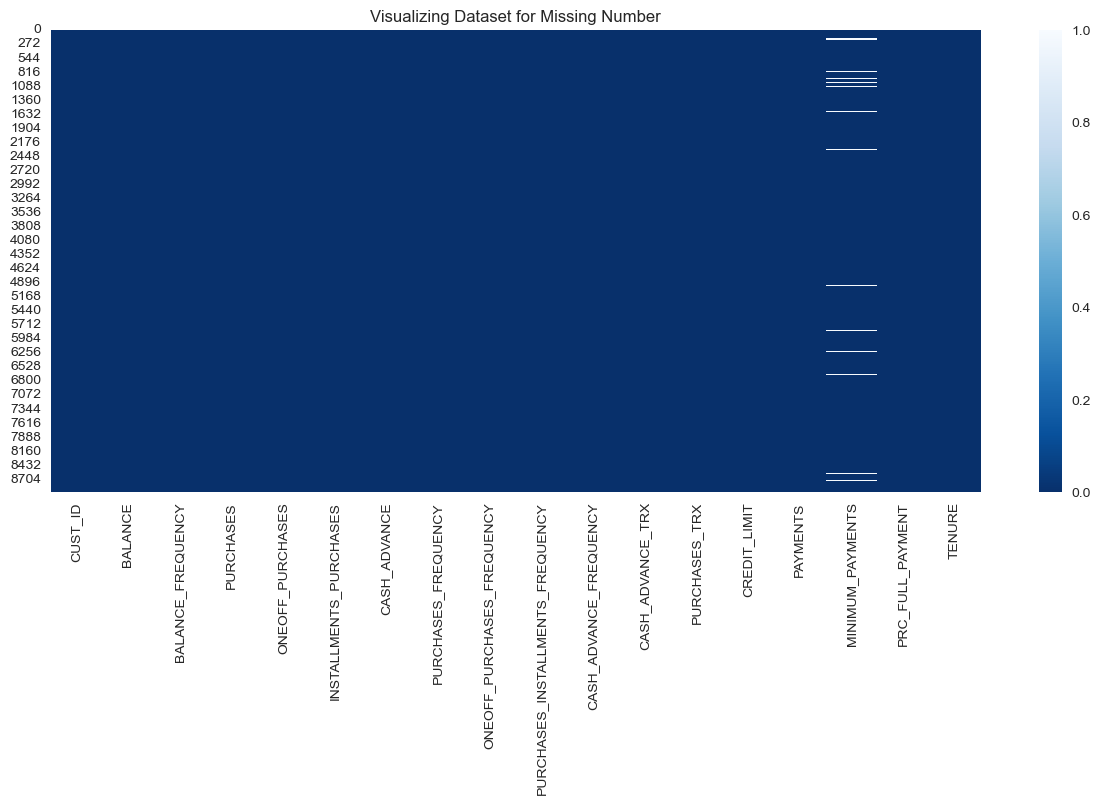

In [9]:
df.isnull().sum()

plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")
plt.title("Visualizing Dataset for Missing Number");

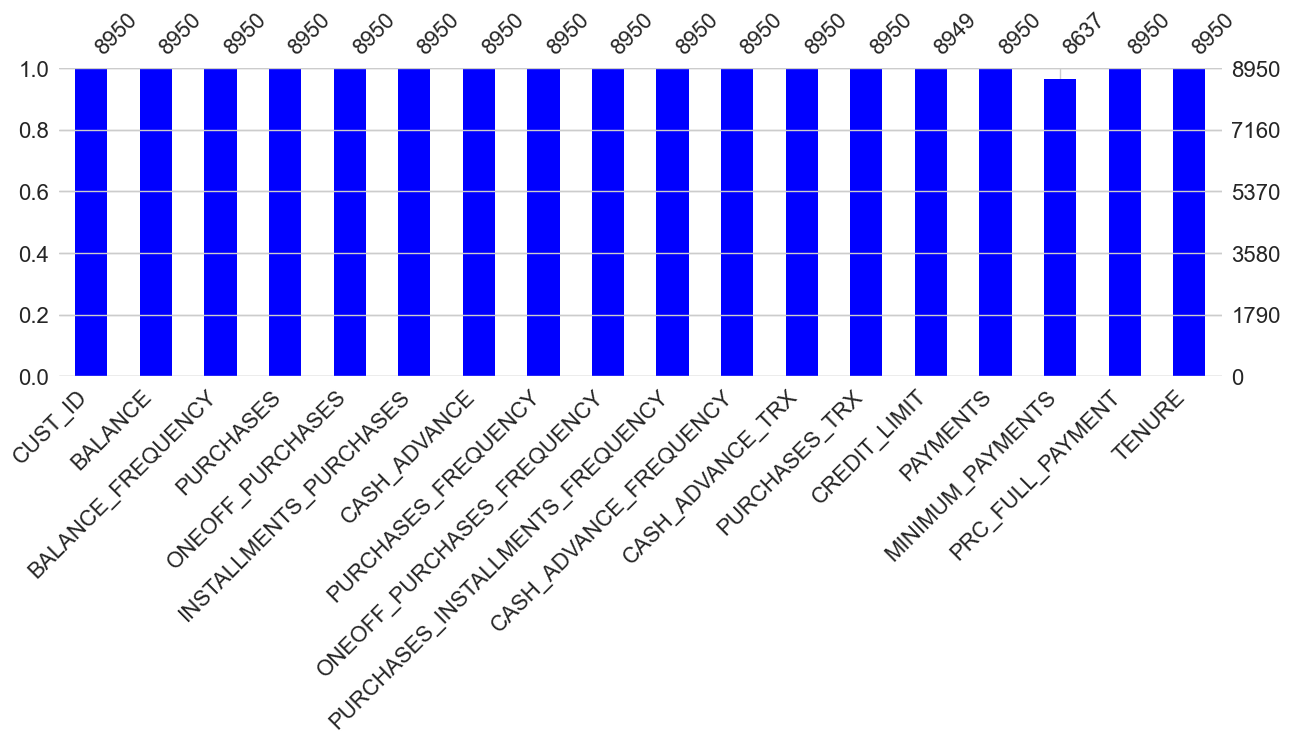

In [10]:
msno.bar(df, color="blue", figsize=(15,4));

In [11]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [12]:
df[df["CREDIT_LIMIT"].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### After investigating the uniqueness of the row, I removed the row with missing values in CREDIT_LIMIT (Cust ID == C15349)

In [14]:
df.CUST_ID.nunique()

8950

In [15]:
# remove the row with missing data
if_C = (df["CUST_ID"]=="C15349")
df.drop(df[if_C].index, inplace=True)

In [16]:
df[df.isnull().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


After thoughtful deliberation, I have decided to handle the missing values in the MINIMUM_PAYMENTS column in two ways for a comprehensive analysis. First, I will impute the missing values with the mean value, ensuring the dataset remains complete. Second, I will remove the rows with missing values to create a comparison for the performance of different algorithms. As the missing values in the MINIMUM_PAYMENTS attribute account for approximately 3.5% of the entire dataset, these steps will allow me to assess the impact of these approaches on the overall analysis effectively.

### Method 1 : Replacing MINIMUM_PAYMENTS null values with the Mean values

In [17]:
# df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(value=df["MINIMUM_PAYMENTS"].mean())

In [18]:
# df.isnull().sum()

### Method 2 : Removing MINIMUM_PAYMENTS null values rows

In [19]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [20]:
col_name = "MINIMUM_PAYMENTS"
df.dropna(subset=[col_name], inplace = True)

In [21]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
df.shape

(8636, 18)

### Checking the Dataset

In [23]:
# checking for duplicate
df.duplicated().sum()

0

In [24]:
numeric_columns = df.select_dtypes(include='number')
negative_values = numeric_columns[numeric_columns < 0].any()
print(negative_values)

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool


In [25]:
#negative_values = df[df < 0].any()
#print(negative_values)

### Exploratory Data Analysis

In [26]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [27]:
"""plt.figure(figsize=(15, 90))
for i, col in enumerate(df.columns):
    if df[col].dtype != "object":
        plt.subplot(18, 1, i+1)
        sns.kdeplot(df[col])
        plt.xlabel(col)
plt.tight_layout()
plt.show()""";

In [28]:
#distribution plots of all the numerical features
"""plt.figure(figsize=(10,60))
for i in range(0,18):
    plt.subplot(18,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'black','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()""";

In [29]:
df.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

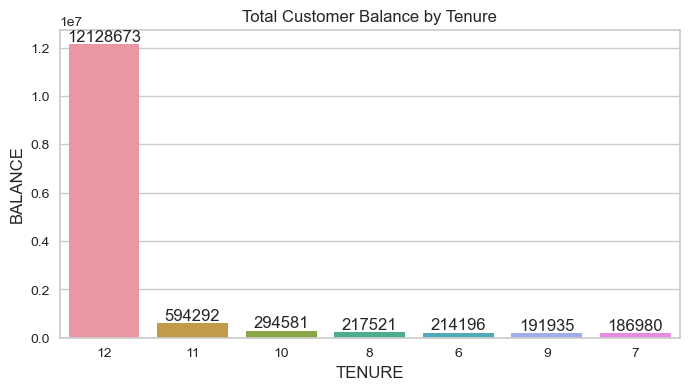

In [30]:
fig, axs=plt.subplots(figsize=(8,4))

tenure_bal= df.groupby("TENURE")["BALANCE"].sum().reset_index()
tenure_bal= tenure_bal.sort_values(by="BALANCE",ascending=False)
tenure_bals= sns.barplot(x="TENURE", data=tenure_bal, y="BALANCE", order= tenure_bal["TENURE"])
tenure_bals.set_title("Total Customer Balance by Tenure")
for i, value in enumerate (tenure_bal["BALANCE"]):  
    plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()    

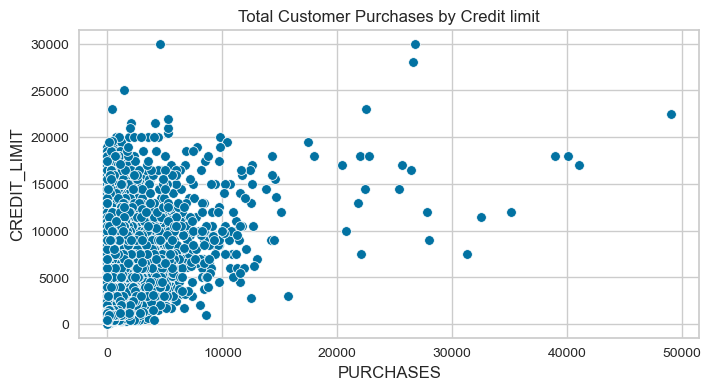

In [31]:
fig, axs=plt.subplots(figsize=(8,4))

#tenure_pur= df.groupby("TENURE")["PURCHASES"].sum().reset_index()
#tenure_pur= tenure_pur.sort_values(by="PURCHASES",ascending=False)
tenure_purs= sns.scatterplot(y="CREDIT_LIMIT", data=df, x="PURCHASES")
tenure_purs.set_title("Total Customer Purchases by Credit limit")
#for i, value in enumerate (tenure_pur["PURCHASES"]):
   # plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()

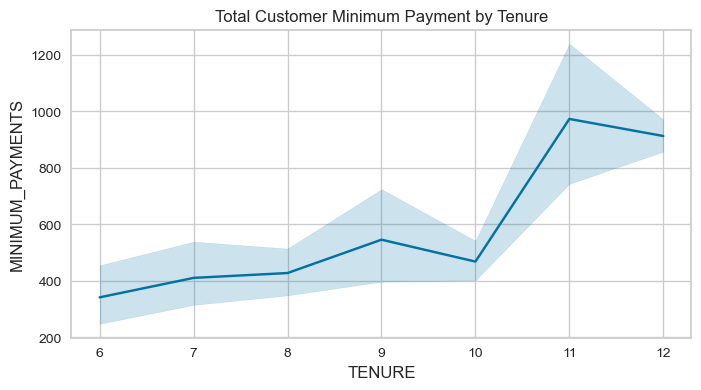

In [32]:
fig, axs=plt.subplots(figsize=(8,4))
#tenure_mpay= df.groupby("TENURE")["MINIMUM_PAYMENTS"].sum().reset_index()
#tenure_mpay= tenure_mpay.sort_values(by="MINIMUM_PAYMENTS",ascending=False), order= tenure_mpay["TENURE"]
tenure_mpays= sns.lineplot(x="TENURE", data=df, y="MINIMUM_PAYMENTS")
tenure_mpays.set_title("Total Customer Minimum Payment by Tenure")
#for i, value in enumerate (tenure_mpay["MINIMUM_PAYMENTS"]):
    #plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()

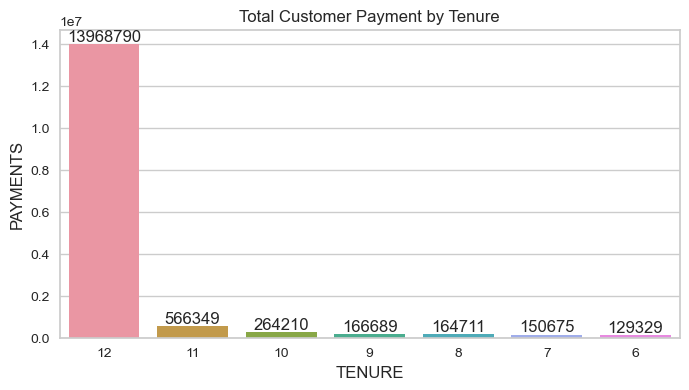

In [33]:
fig, axs=plt.subplots(figsize=(8,4))
tenure_pay= df.groupby("TENURE")["PAYMENTS"].sum().reset_index()
tenure_pay= tenure_pay.sort_values(by="PAYMENTS",ascending=False)
tenure_pays= sns.barplot(x="TENURE", data=tenure_pay, y="PAYMENTS", order= tenure_pay["TENURE"])
tenure_pays.set_title("Total Customer Payment by Tenure")
for i, value in enumerate (tenure_pay["PAYMENTS"]):
    plt.text(i, value, f"{value:.0f}", ha="center", va="bottom")
plt.show()

In [34]:
df.drop(["CUST_ID"], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


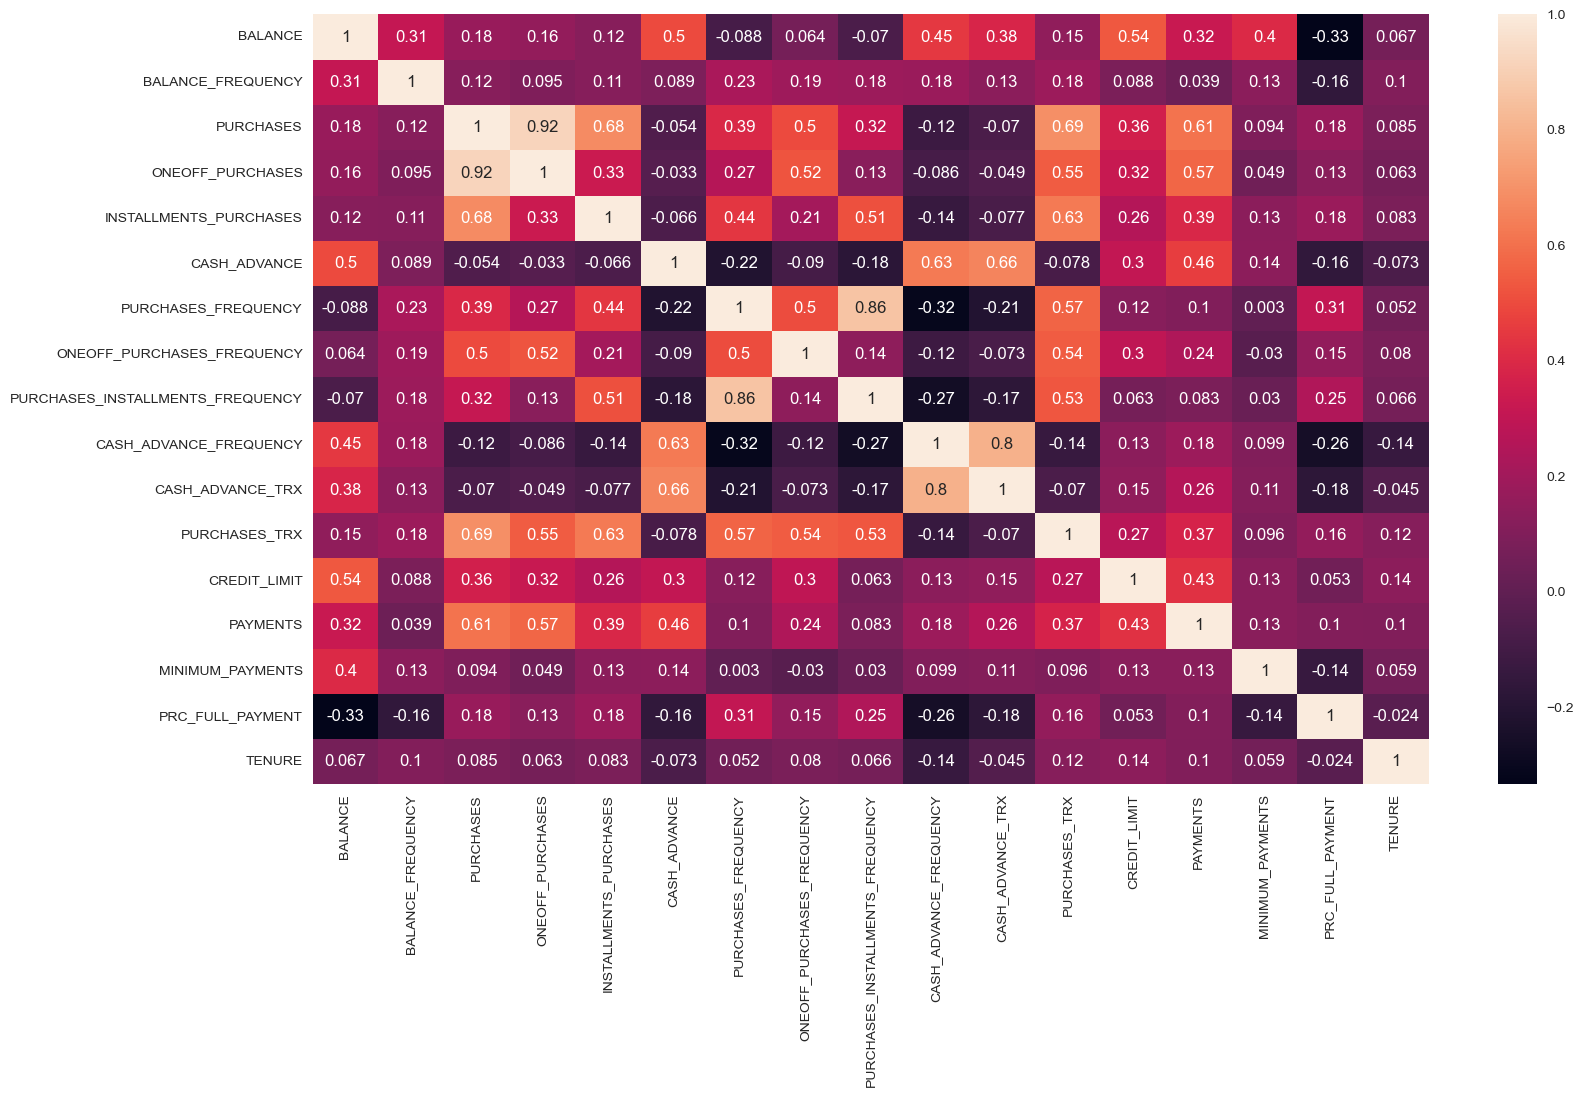

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True);

### Data Preprocessing / Feature Engineering

In [36]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Normalizing and Standardizing the Data

In [37]:
#label encoding (will make the categorical data a numerical dtype, int/float)
# method to use if the dataset contains object data type
#looping through the data to Normalize and Standardize
encoder= LabelEncoder()
for c in df.columns[0:]:
    if(df[c].dtype=="object"):
        df[c]= encoder.fit_transform(df[c])
    else:
        df[c]=df[c]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [38]:
# normalize data (will make the data machine learning dtype)(Output in a numpy array)
"""scaler = StandardScaler()
df = scaler.fit_transform(df)
df""";

In [39]:
# normalize data (will make the data machine learning dtype)(Output in a dataframe)
scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


### Dimensionality Reduction

In [40]:
"""pca = PCA(n_components=3)
pca.fit_transform(df)
df""";

In [41]:
pca = PCA(n_components=3)
df1= pd.DataFrame(pca.fit_transform(df), columns=(["col1","col2","col3"]))
df1.head()

,col1,col2,col3
0,-1.696391,-1.122581,0.491523
1,-1.215671,2.435648,0.694671
2,0.935851,-0.385205,-0.025974
3,-1.614636,-0.724585,0.272309
4,0.223701,-0.783610,-1.184463


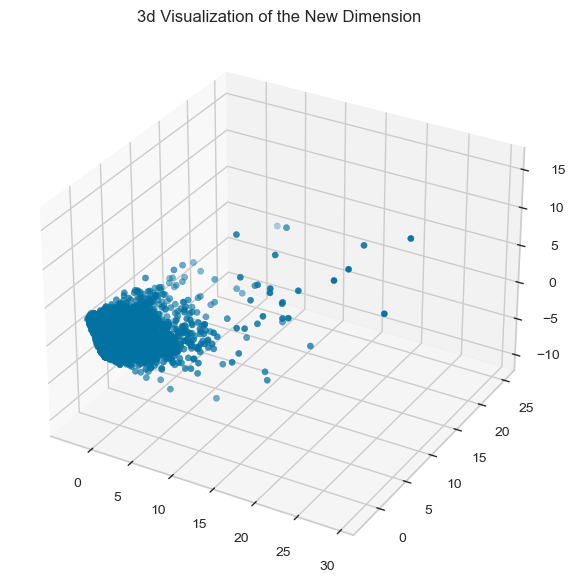

In [42]:
# visualise the new data dimensions
x = df1["col1"]
y = df1["col2"]
z = df1["col3"]

fig = plt.figure(figsize=(10,7))
ax= fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o")
ax.set_title("3d Visualization of the New Dimension");

<span style="color:blue">
    <h3>NOTE:</h3>
    When comparing different clustering methods and visualizing their results, make sure to comment out the code for each clustering approach except for the one you want to analyze. By doing this, you can isolate and study each clustering method separately with the visualization. This approach allows you to examine the elbow plot or any other visualization specific to the selected method, making it easier to determine the optimal number of clusters.</span>

### Method 1 : Kmeans() with KElbowVisualizer() for Clustering

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

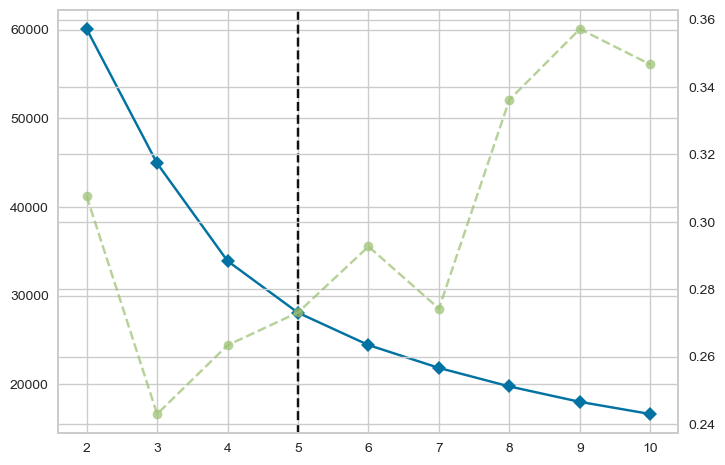

In [43]:
# clustering section
# using the k elbow method to figure the appropriate number of clusters

elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(df1)

In [44]:
# Apply Kmeans Clustering
kmeans = KMeans(n_clusters=5,random_state=42)
y_means= kmeans.fit_predict(df1)
df1["clusters"] = y_means
df["clusters"] = y_means

In [45]:
df1.head(3)

,col1,col2,col3,clusters
0,-1.696391,-1.122581,0.491523,2
1,-1.215671,2.435648,0.694671,0
2,0.935851,-0.385205,-0.025974,1


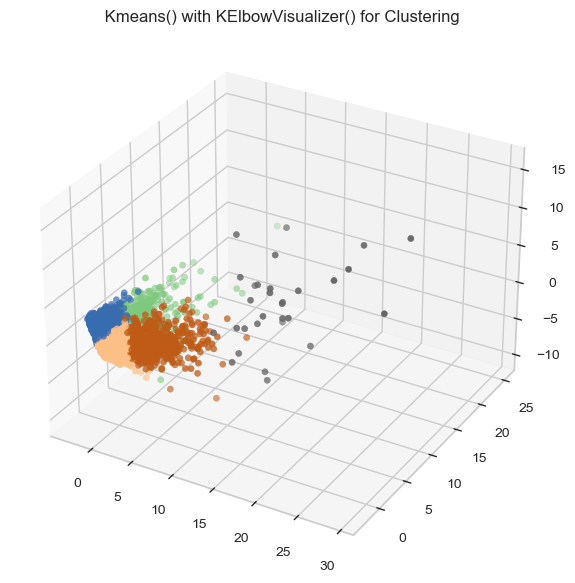

In [46]:
# plotting new data points
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=df1["clusters"],marker="o", cmap=cmap)
ax.set_title(" Kmeans() with KElbowVisualizer() for Clustering");

### Method 2 : AgglomerativeClustering() with KElbowVisualizer() for Clustering

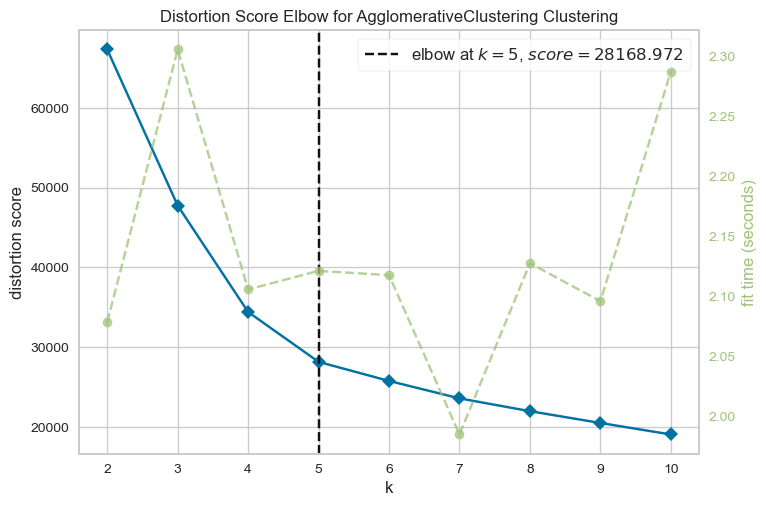

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# clustering section
# using the k elbow method to figure the appropriate number of clusters

model = AgglomerativeClustering()
elbow_k = KElbowVisualizer(model)
elbow_k.fit(df1)
elbow_k.show()

In [48]:
# Apply Kmeans Clustering

#Agg_Cluster = AgglomerativeClustering(n_clusters=5,random_state=42) #1
Agg_Cluster = elbow_k.elbow_value_   #2
model = AgglomerativeClustering(n_clusters=Agg_Cluster) #2
y_means = model.fit_predict(df1)  #1,2
df1["clusters"] = y_means
df["clusters"] = y_means
print("Optimal number of Agg_clusters:", Agg_Cluster)  #2
print("Cluster assignments:", y_means)

Optimal number of Agg_clusters: 5
Cluster assignments: [0 2 3 ... 3 0 0]


In [49]:
df1.head(3)

,col1,col2,col3,clusters
0,-1.696391,-1.122581,0.491523,0
1,-1.215671,2.435648,0.694671,2
2,0.935851,-0.385205,-0.025974,3


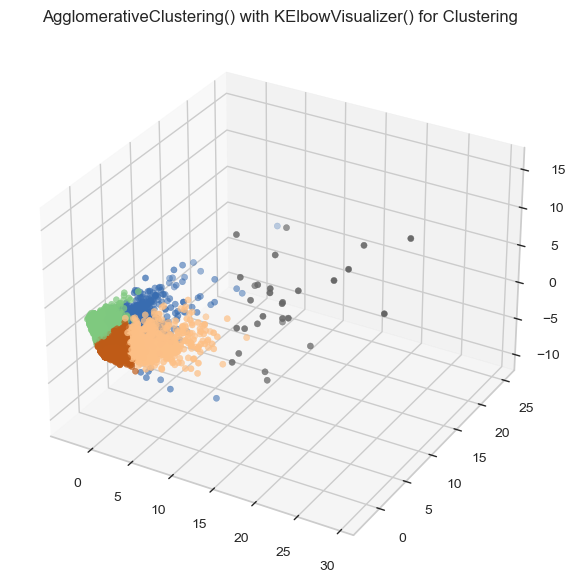

In [50]:
# plotting new data points
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=df1["clusters"],marker="o", cmap=cmap)
ax.set_title("AgglomerativeClustering() with KElbowVisualizer() for Clustering");

### Method 3 : SpectralClustering() with KElbowVisualizer() for Clustering

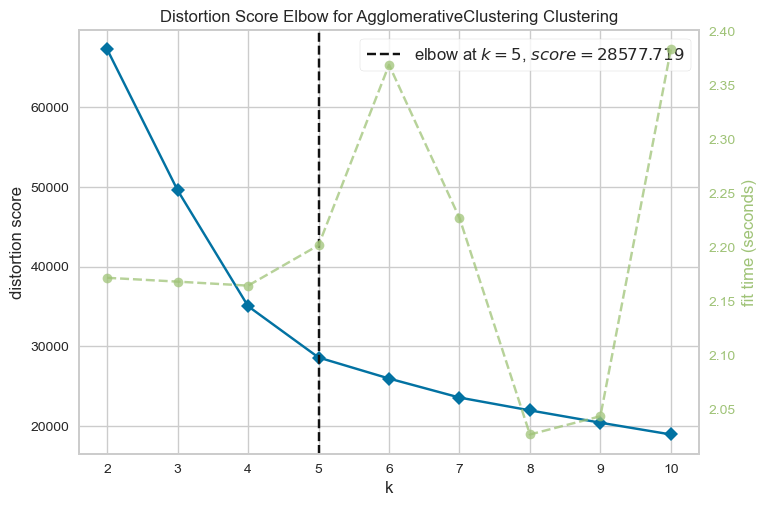

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# clustering section
# using the k elbow method to figure the appropriate number of clusters

models = SpectralClustering()
elbow_k = KElbowVisualizer(model)
elbow_k.fit(df1)
elbow_k.show()

In [52]:
# Apply Kmeans Clustering

Sp_Cluster = SpectralClustering(n_clusters=5,random_state=42) #1
#Sp_Cluster = elbow_k.elbow_value_   #2
#models = SpectralClustering(n_clusters=Sp_Cluster) #2
y_means = models.fit_predict(df1)  #1,2
df1["clusters"] = y_means
df["clusters"] = y_means
#print("Optimal number of Agg_clusters:", Sp_Cluster)  #2
print("Cluster assignments:", y_means)

Cluster assignments: [3 0 3 ... 0 3 0]


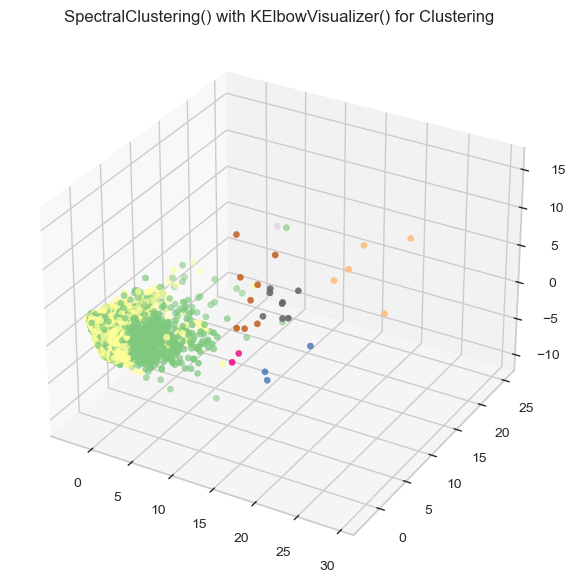

In [53]:
# plotting new data points
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=df1["clusters"],marker="o", cmap=cmap)
ax.set_title("SpectralClustering() with KElbowVisualizer() for Clustering");

### Method 4 : DBSCAN()  for Clustering

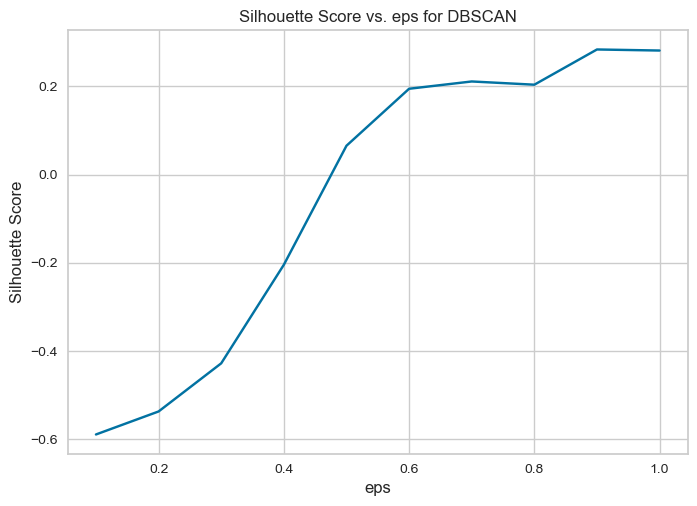

In [54]:
from sklearn.metrics import silhouette_score
# Define a range of eps values to try
eps_values = np.linspace(0.1, 1.0, num=10)

# Calculate silhouette scores for each value of eps
silhouette_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(df1)
    labels = dbscan.labels_
    if len(np.unique(labels)) > 1:  # Avoid silhouette score for a single cluster
        silhouette_scores.append(silhouette_score(df1, labels))
    else:
        silhouette_scores.append(0)  # Silhouette score is 0 for a single cluster

# Plot the silhouette scores for each eps value
plt.plot(eps_values, silhouette_scores)
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. eps for DBSCAN')
plt.show()


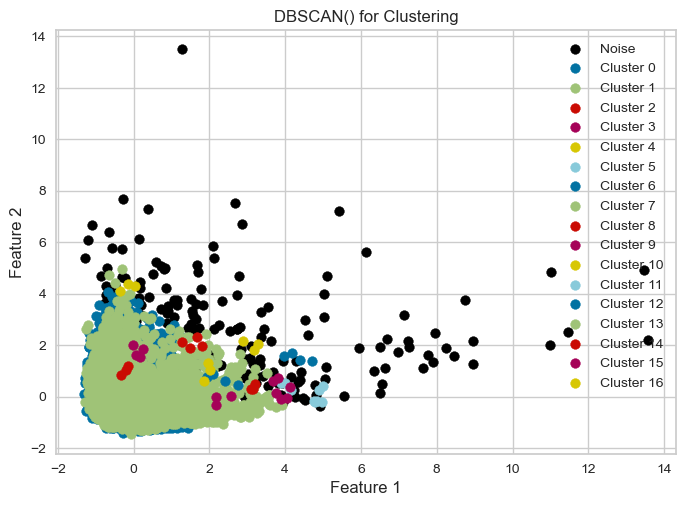

In [55]:
data = df1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels = dbscan.fit_predict(data_scaled)
# Plotting the clusters
plt.scatter(data_scaled[labels == -1, 0], data_scaled[labels == -1, 1], c='black', label='Noise')
for cluster_label in np.unique(labels[labels != -1]):
    plt.scatter(data_scaled[labels == cluster_label, 0], data_scaled[labels == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN() for Clustering')
plt.legend()
plt.show()

# plotting new data points
"""cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=df1["clusters"],marker="o", cmap=cmap)
ax.set_title("3d Visualization of the Data by their Clusters")""";

In [56]:
df1.head(3)

,col1,col2,col3,clusters
0,-1.696391,-1.122581,0.491523,3
1,-1.215671,2.435648,0.694671,0
2,0.935851,-0.385205,-0.025974,3


### Visualization After Clustering

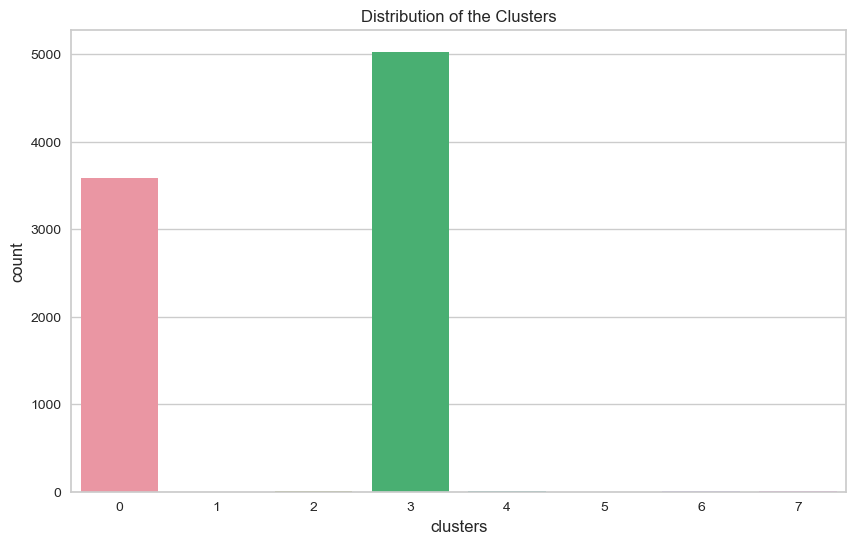

In [57]:
# plot the clusters on a ber viuslization
plt.figure(figsize=(10,6))
sns.countplot(x = df1.clusters)
plt.title("Distribution of the Clusters");

In [58]:
# PURCHASES, 

In [59]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'clusters'],
      dtype='object')

In [60]:
a=df.groupby("clusters")["PURCHASES_TRX"].sum().reset_index()
a

,clusters,PURCHASES_TRX
0,0,807.696264
1,1,0.236974
2,2,42.886270
3,3,-942.733450
4,4,32.403986
5,5,7.980200
6,6,24.017391
7,7,27.512365


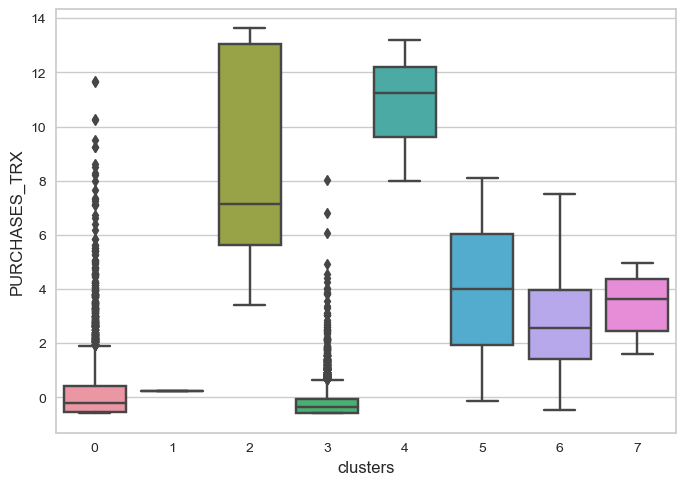

In [61]:
sns.boxplot(x="clusters", y="PURCHASES_TRX", data=df);

In [62]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181,3
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181,0
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181,3


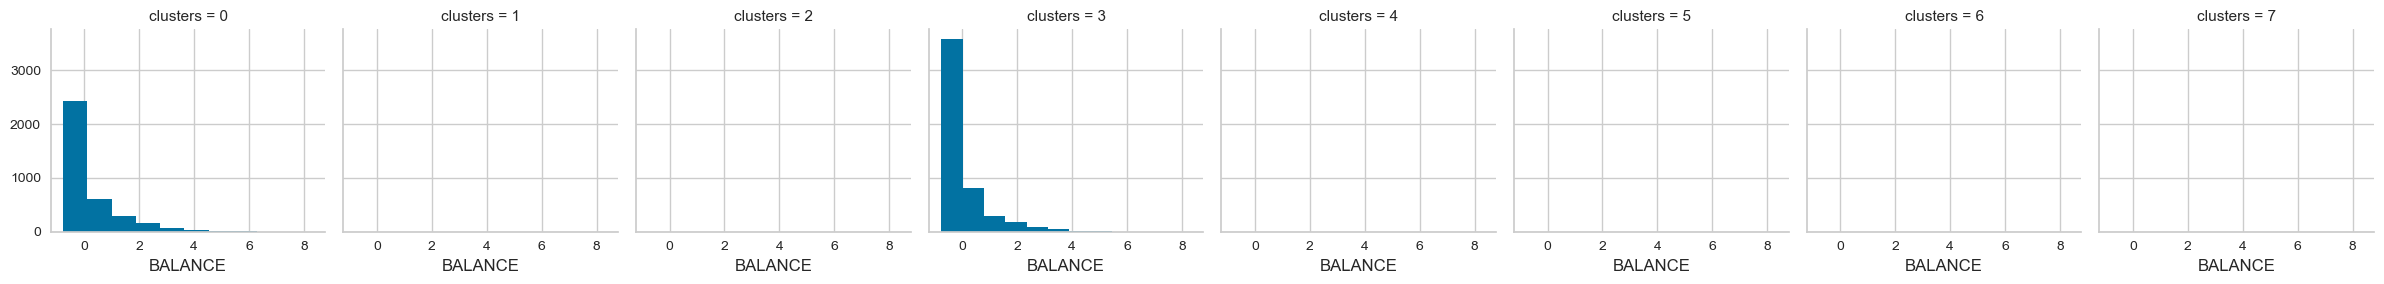

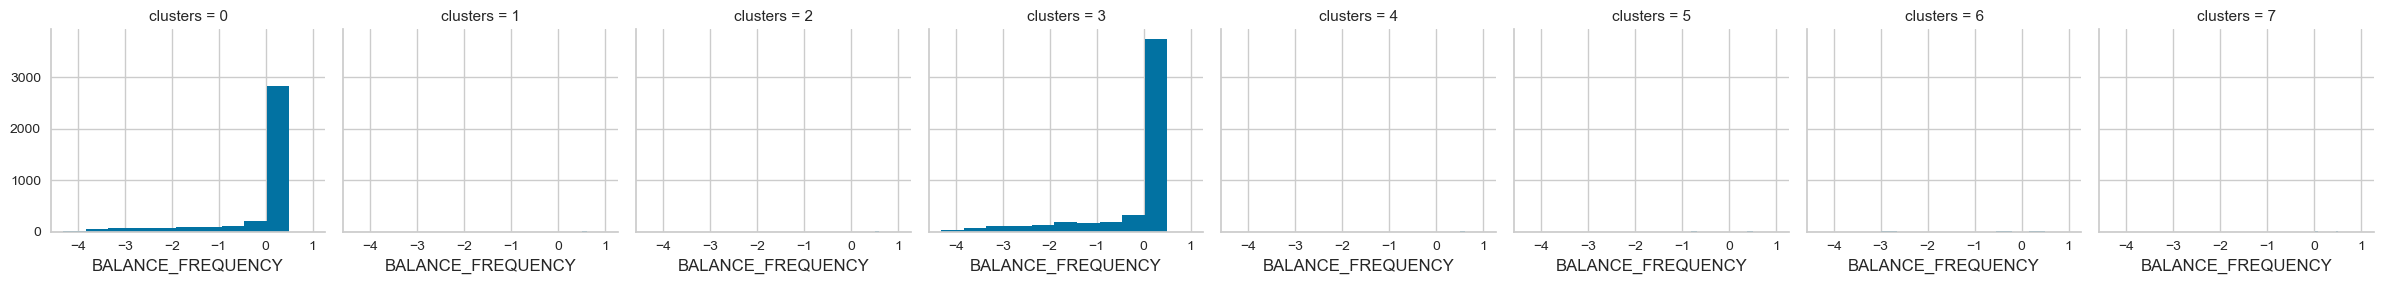

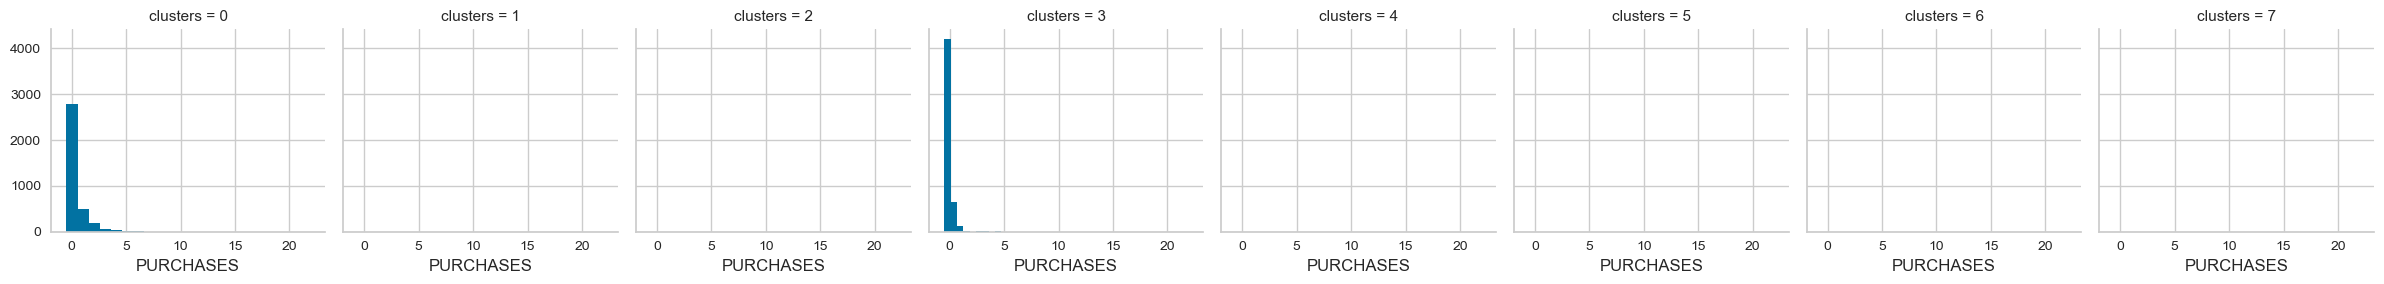

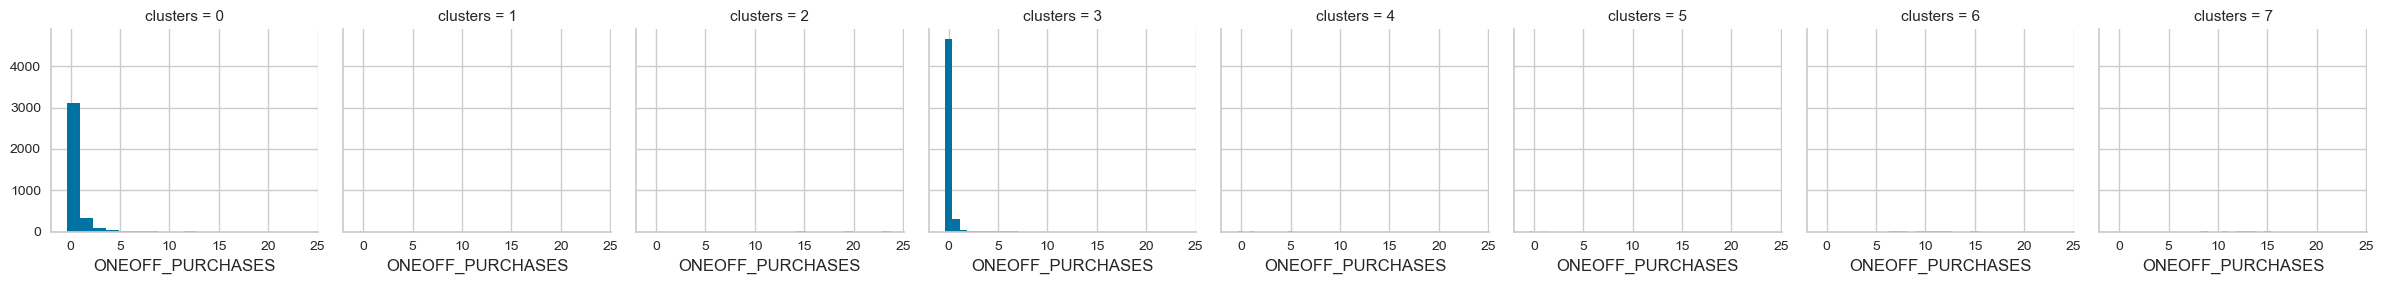

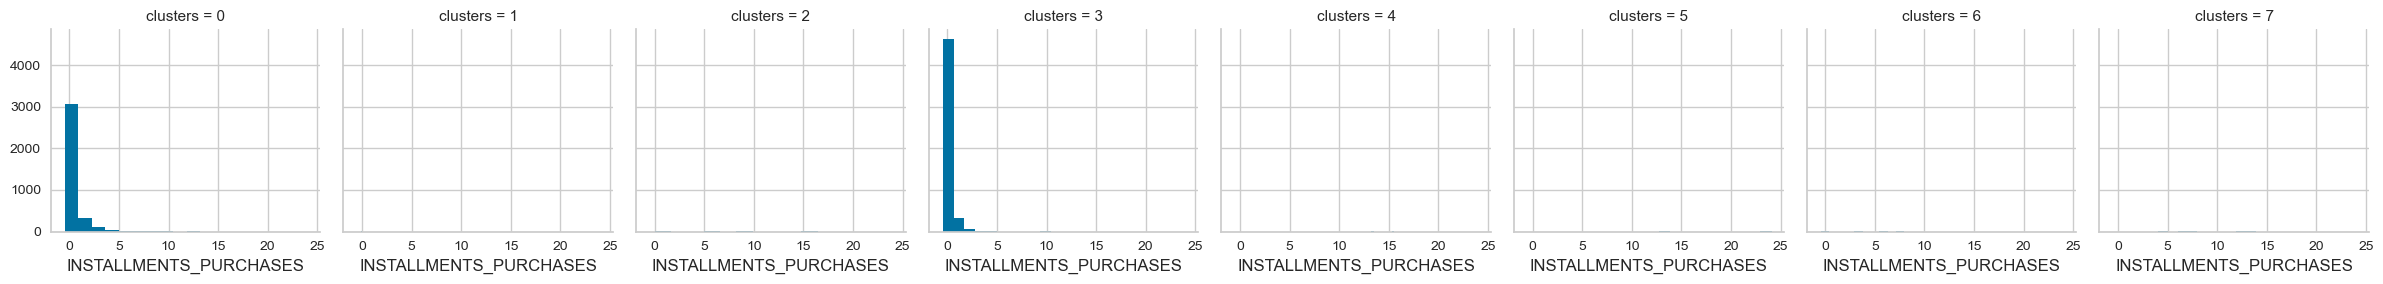

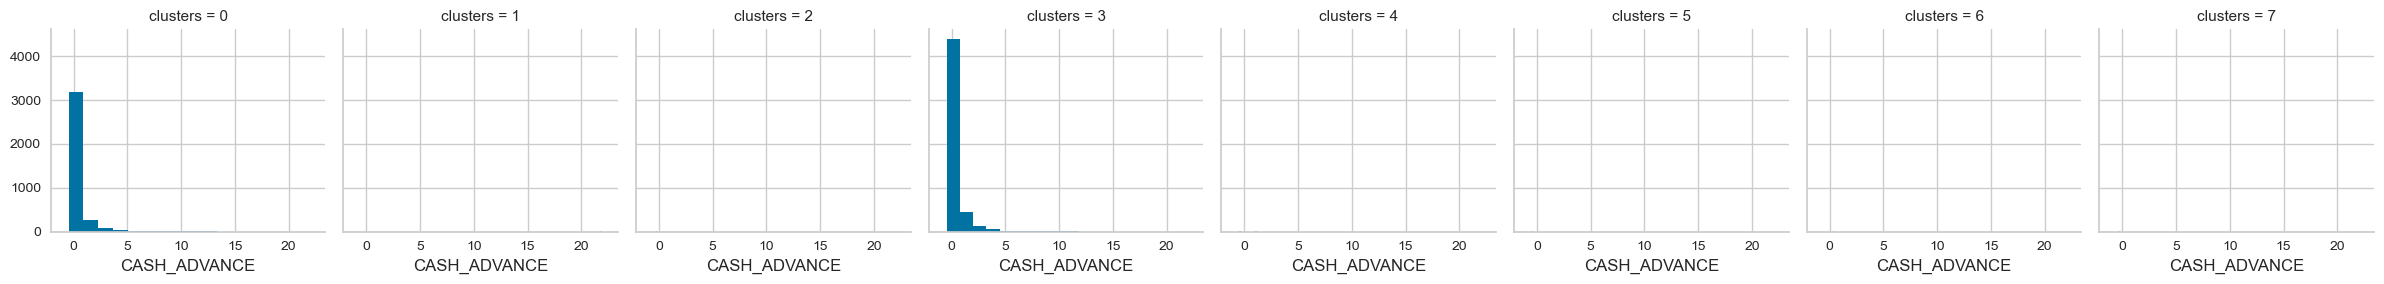

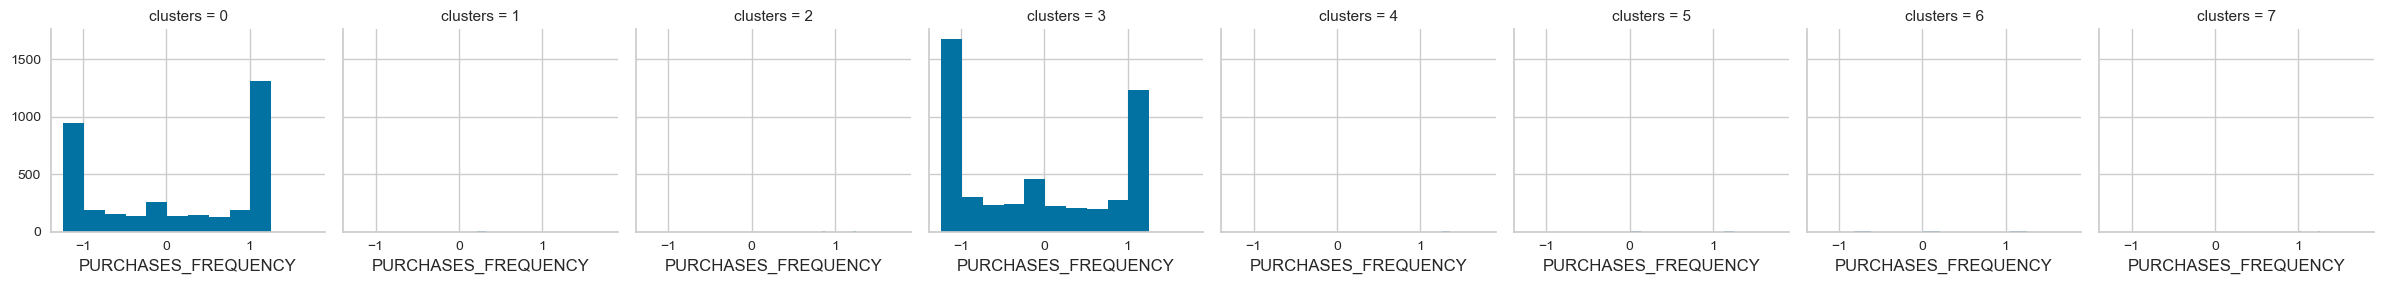

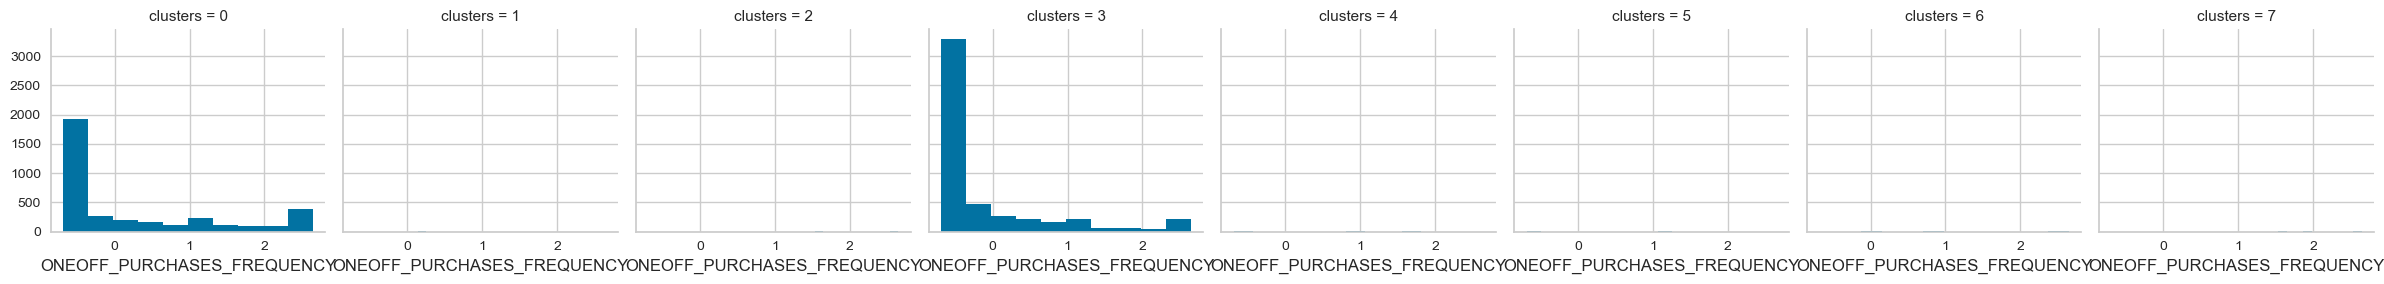

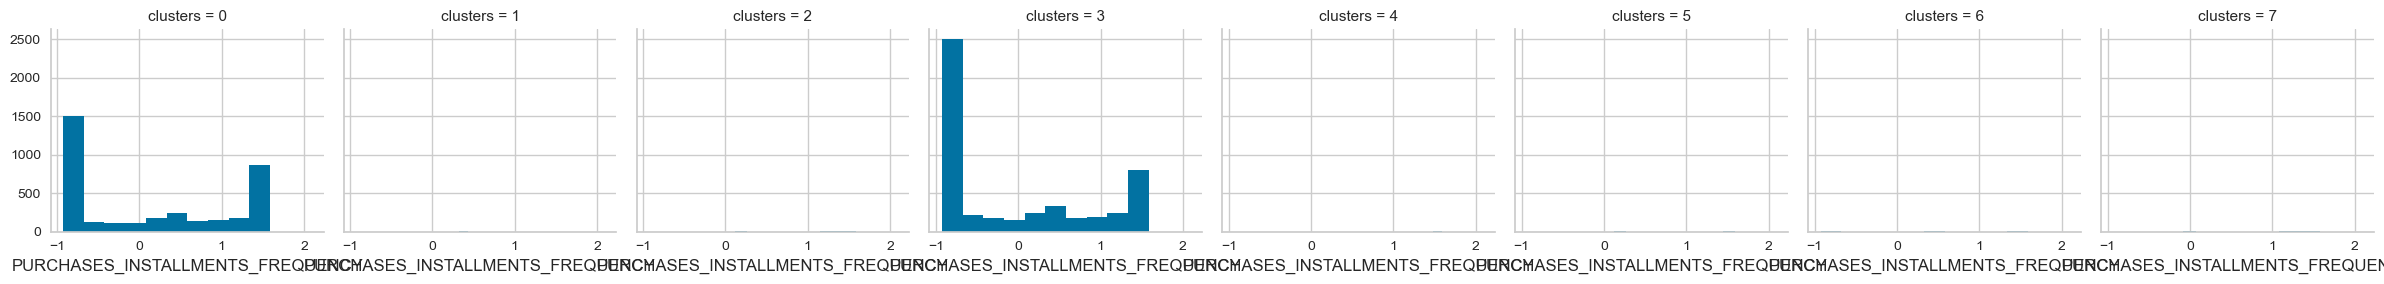

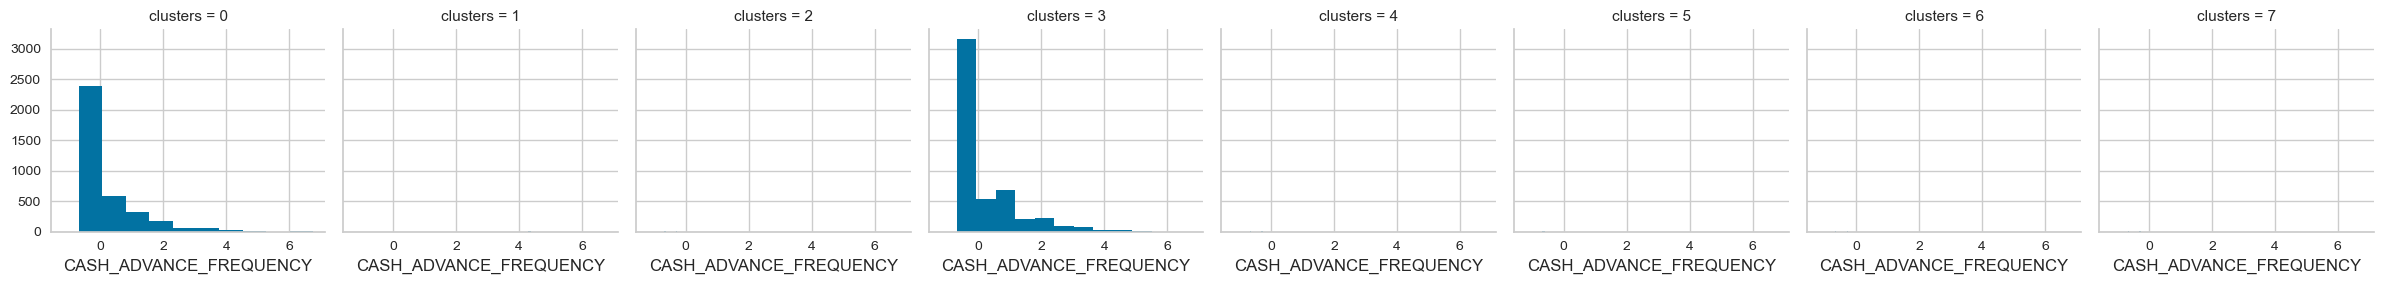

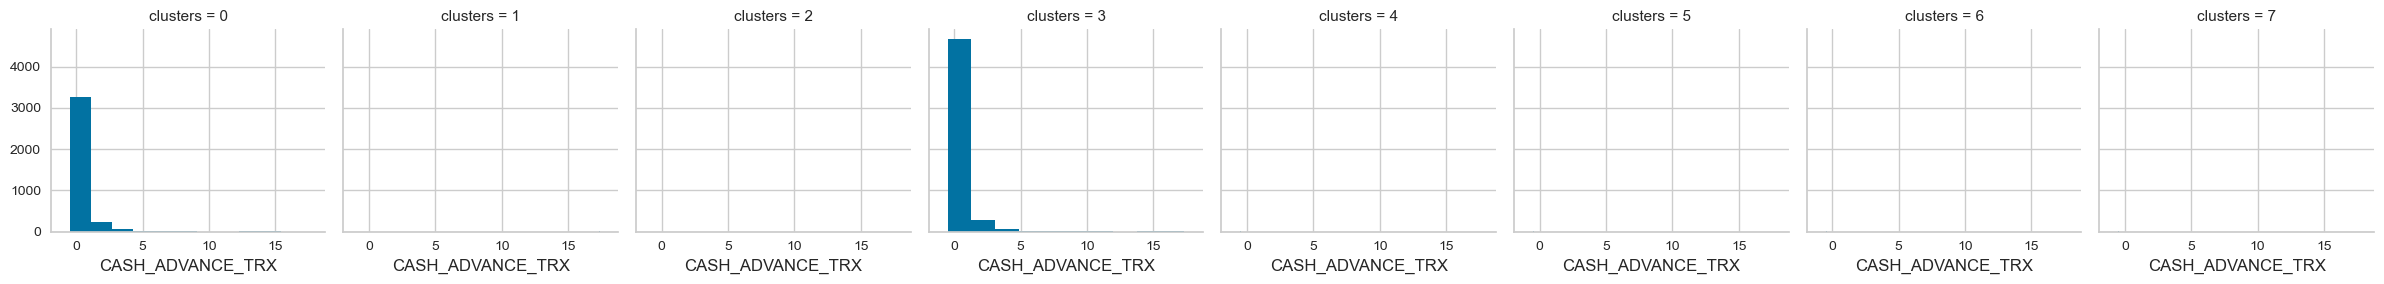

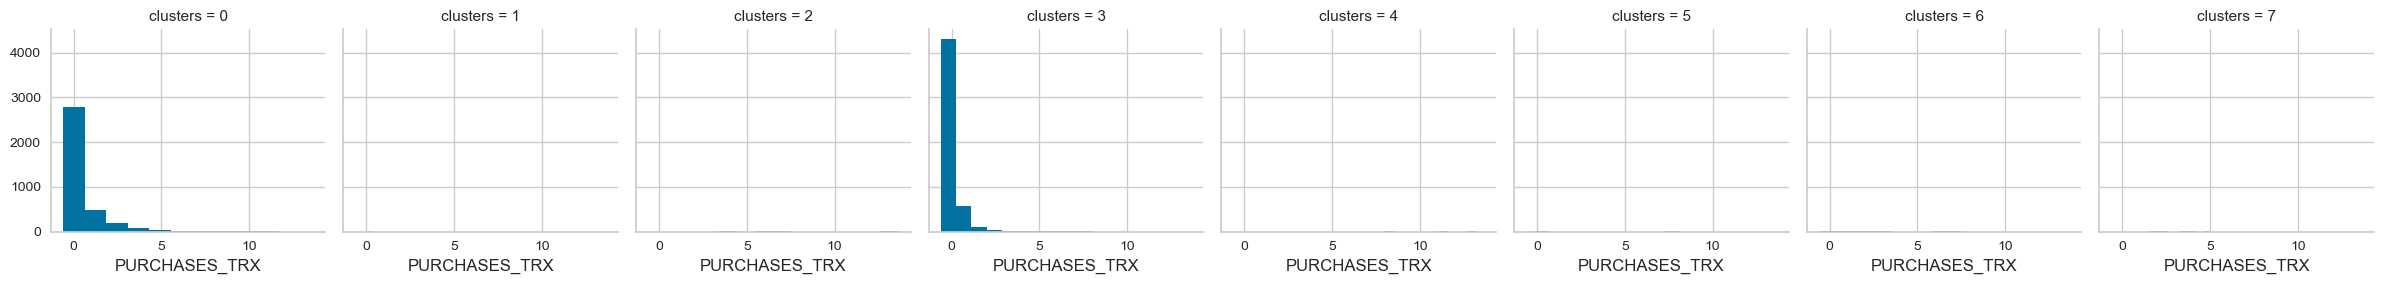

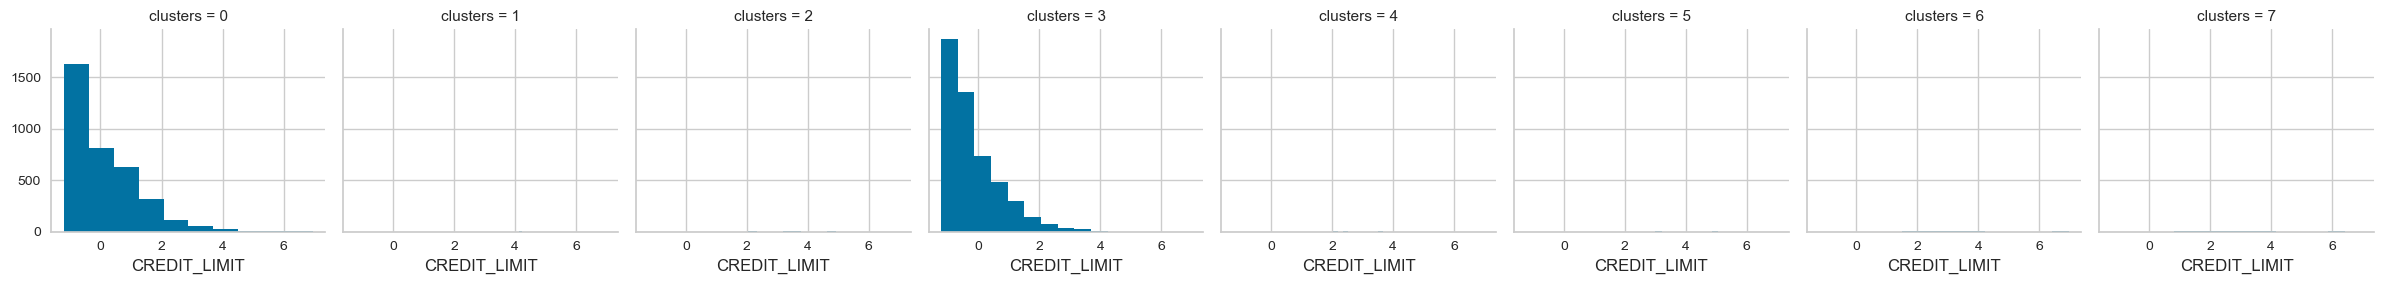

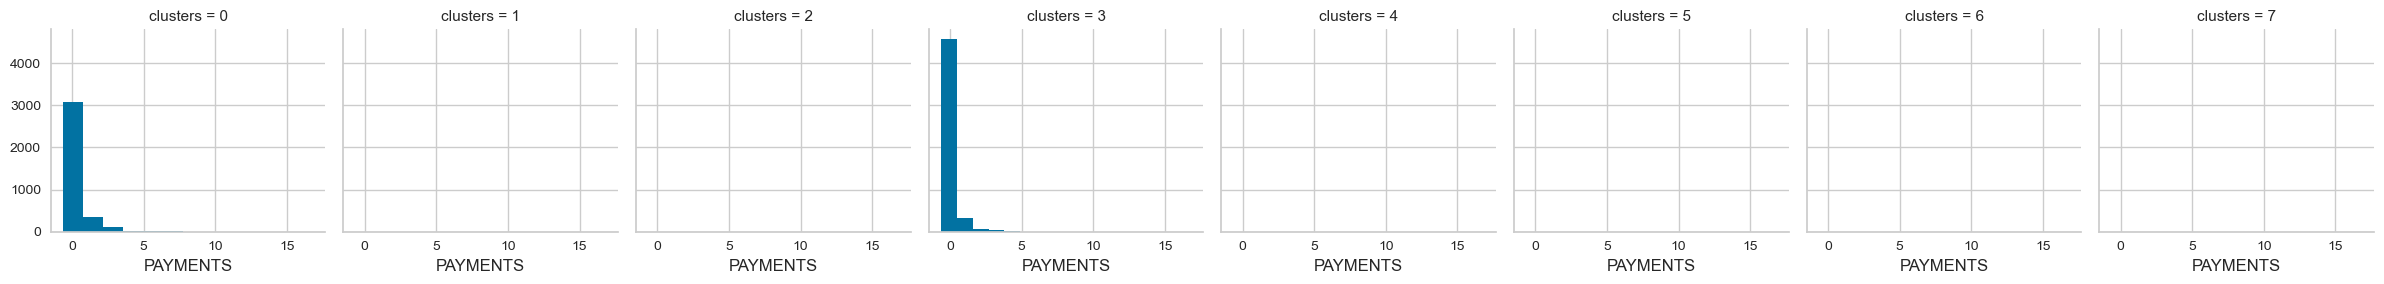

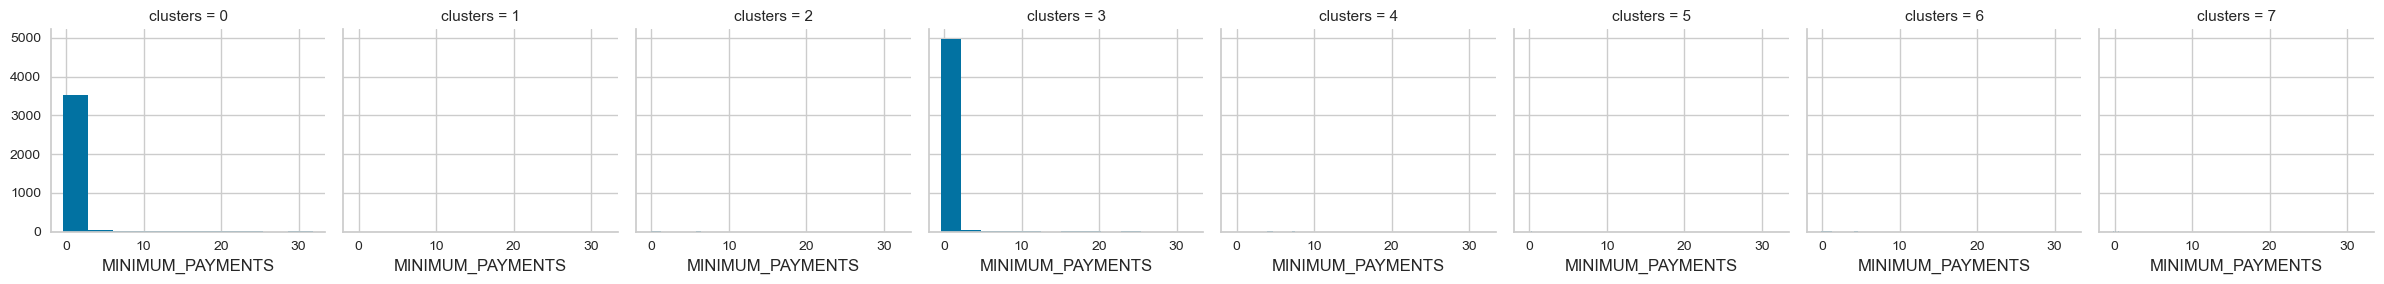

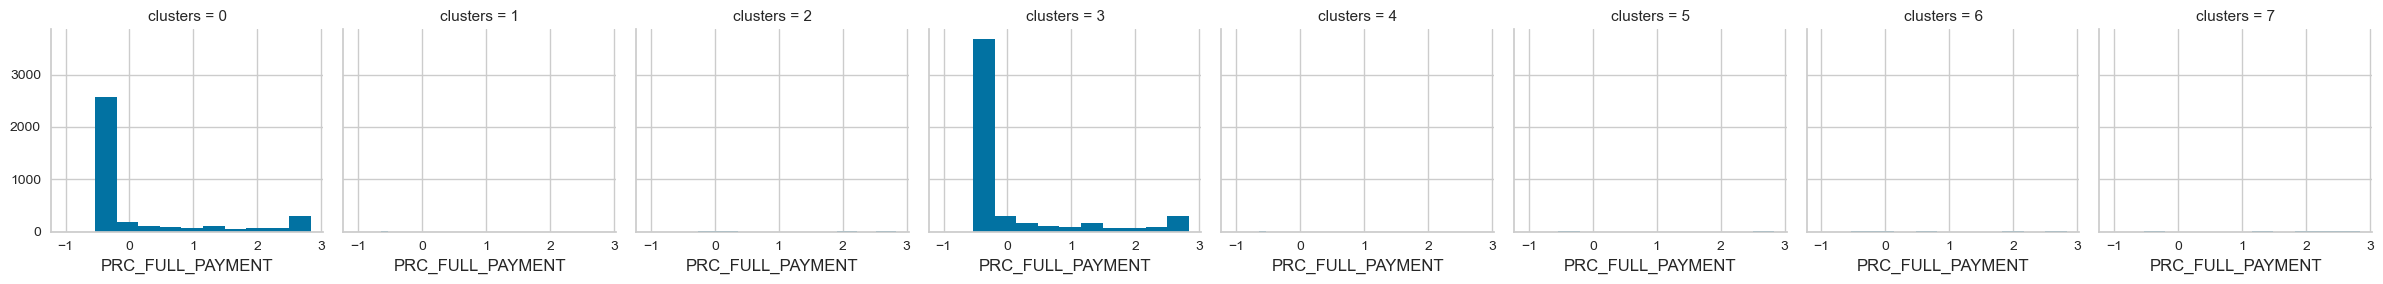

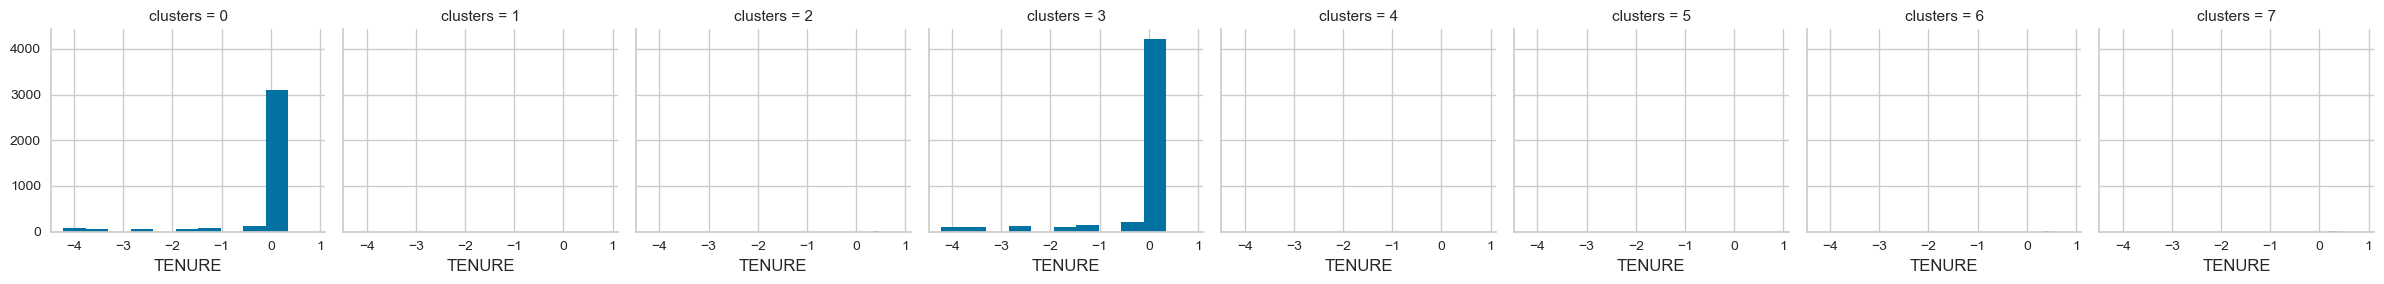

In [63]:
#if 'clusters' in df1.columns:
for c in df.drop(["clusters"], axis=1):
    grid = sns.FacetGrid(df, col="clusters")
    grid = grid.map(plt.hist, c);

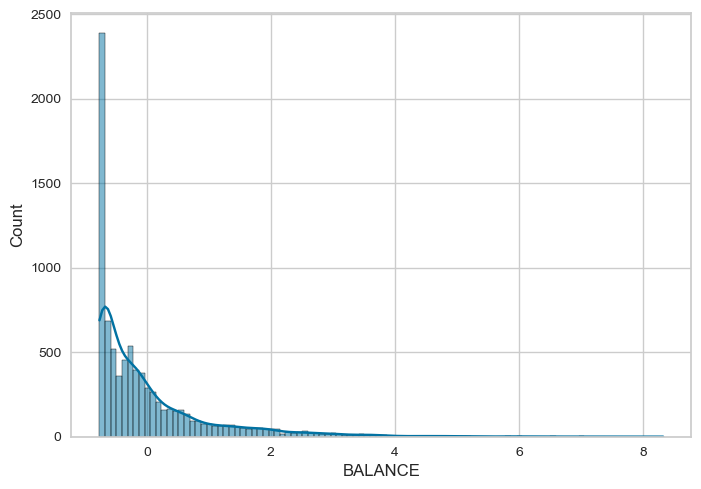

In [64]:
#df["BALANCE"].plot(kind="hist")
sns.histplot(df["BALANCE"], kde=True);

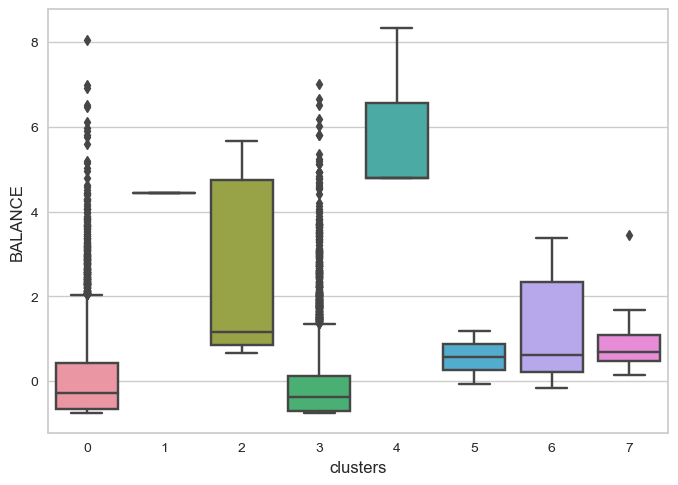

In [65]:
sns.boxplot(x="clusters", y="BALANCE", data=df);